In [1]:
%matplotlib inline
from fns import *
from fns.functionsTF import *

********************************************************************************
functionsTF loaded!
********************************************************************************


In [2]:
params = []
res = []
config = load_config()
glist = [1,5]
    
for g in glist:
    # number of iterations to run (dt = 0.1ms, T=2000 -> d=200 ms)
    T = 2000
    
    # initialize the model
    gpu = TfConnEvolveNet(config=config, T=T)
   
    # number of excitatory neurons
    gpu.NE1=800
    # number of inhibitory neurons
    gpu.NI1=200
    # mean external drive
    gpu.nu = 120
    # choose on which hardware to run the simulation
    gpu.device = '/cpu:0' #'/gpu:0'

    # mean gap junction coupling
    gpu.g1 = g
    # when to start plasticity 
    gpu.stabTime = np.inf # static network
    # when to stop plasticity
    gpu.stopTime = np.inf
    
    # save the spikes
    gpu.spikeMonitor = True
    # save the individual voltages, currents, etc.
    gpu.monitor_single = True

    # run the simulation
    gpu.runTFSimul()
    res.append(gpu)
    
    # release memory
    del gpu  
    gc.collect()


-- init with symmetric gap junctions
-- init with symmetric gap junctions
-- symmetric plasticity change


100%|██████████| 2000/2000 [00:06<00:00, 333.21it/s]


-- init with symmetric gap junctions
-- init with symmetric gap junctions
-- symmetric plasticity change


100%|██████████| 2000/2000 [00:05<00:00, 344.14it/s]


## Raster Plots

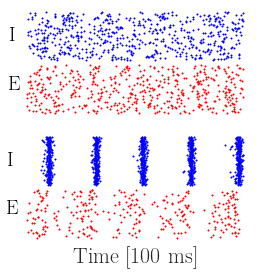

In [3]:
fig = plt.figure(figsize=(5,4))

glist = [1,5]
for i in range(2):
    ax = fig.add_subplot(2, 1, i+1)
    raster = res[i].raster
    x,y = np.where(raster[-1000:,700:800]!=0)
    ax.scatter(x+100,y, marker='.', s=10, color='r')
    x,y = np.where(raster[-1000:,800:900]!=0)
    ax.scatter(x+100,y+110, marker='.', s=10, color='b')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(20, 150, 'I', fontweight='bold', fontsize=20 )
    ax.text(20, 50, 'E', fontweight='bold', fontsize=20 )
plt.xlabel('Time [100 ms]')
plt.tight_layout()
plt.subplots_adjust(left=0.3)

## Voltage Traces

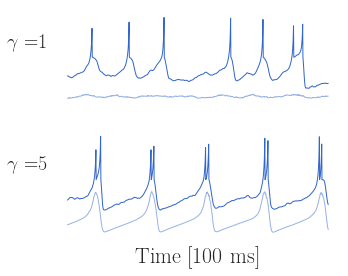

In [4]:
Icolor = '#3366cc'
Ecolor = '#FF6868'
fig = plt.figure(figsize=(5,4))
for i in range(2):
    gpu = res[i]
    ax2 = fig.add_subplot(111)
    # get voltage from the 40th inhibitory neuron
    ax2.plot(gpu.vAll[840][-1000:] - i*200, c=Icolor)
    # get the mean voltage
    ax2.plot(gpu.vmI1[-1000:]/200 - 40 - i*200, c=Icolor, alpha=0.5)
    ax2.set_xticks([])
    ax2.set_yticks([])
plt.yticks([-20,-220], [r'$\gamma = $%d' % glist[0], r'$\gamma = $%d' % glist[1]])
plt.xlabel('Time [100 ms]')
plt.tight_layout()



In [5]:
plt.plot(vAll[0][:])

NameError: name 'vAll' is not defined